## Observations and Insights 

ToDo: List 3 points

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_data['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

'''
Filter out duplicates by Mouse ID and Timepoint:
See usage on https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/

We are only interested in unique Mouse ID values
'''

dup_ids = mouse_data[mouse_data.duplicated(['Mouse ID', 'Timepoint'])]\
                          ['Mouse ID'].unique()
print(dup_ids)


['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

'''
 Get data if Model ID is in the list returned from above.
 Better not to hard code values.
 Based on https://stackoverflow.com/questions/12065885/filter-dataframe-rows-if-value-in-column-is-in-a-set-list-of-values
'''
mouse_data[mouse_data['Mouse ID'].isin(dup_ids)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data = mouse_data[mouse_data['Mouse ID'].isin(dup_ids) == False]


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_data['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Define an empty dictionary to collect metrics per each regimen
regimen_dict = {}
regimen_group_data = mouse_data.groupby(['Drug Regimen'])

# aka key value pairs
for regimen, tumor_vols in  regimen_group_data['Tumor Volume (mm3)']:
    mean = np.mean(tumor_vols)
    median = np.median(tumor_vols)
    var = np.var(tumor_vols, ddof=0)
    std = np.std(tumor_vols, ddof=0)
    sem = st.sem(tumor_vols)
    regimen_dict[regimen] = {
                            'mean': mean,
                            'median': median,
                            'var': var,
                            'std': std,
                            'sem': sem
    }

'''
There might be DF based method to append a row each time, but 
this works as well
See 'Get a DataFrame from data in a Python dictionary' 
on https://www.webpages.uidaho.edu/~stevel/cheatsheets/Pandas%20DataFrame%20Notes_12pages.pdf
'''
summary_df = pd.DataFrame.from_dict(regimen_dict, orient='index')

summary_df


,mean,median,var,std,sem
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html WTF...

regimen_group_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var','std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

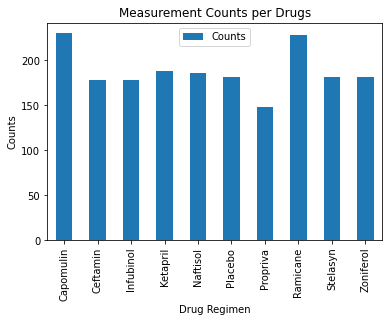

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_group_counts = pd.DataFrame(regimen_group_data['Timepoint'].count())
# Rename the field correctly
regimen_group_counts.rename(columns={'Timepoint':'Counts'}, inplace=True)

regimen_group_counts.plot(kind='bar', title="Measurement Counts per Drugs")
plt.ylabel("Counts")
plt.show()



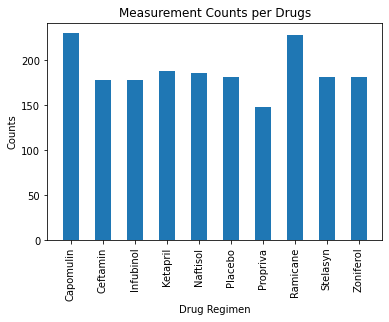

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


# Get index(drug names) values as list.
# https://stackoverflow.com/questions/18358938/get-row-index-values-of-pandas-dataframe-as-list
drug_names = regimen_group_counts.index.values.tolist()
drug_counts = regimen_group_counts['Counts']

plt.bar(drug_names, drug_counts, width=0.5)
plt.title("Measurement Counts per Drugs")
plt.xlabel("Drug Regimen")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show()

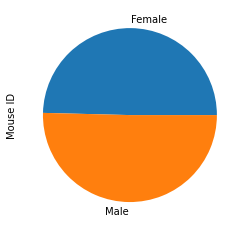

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_data.groupby(['Sex'])['Mouse ID'].nunique().plot(kind='pie')
plt.show()
#ToDo: Make it pretty

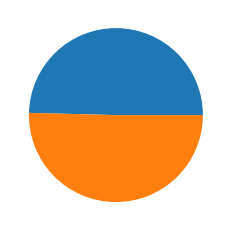

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_data.groupby(['Sex'])['Mouse ID'].nunique())
plt.show()
#ToDo: Make it pretty

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
interested_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = mouse_data.groupby(['Mouse ID'])['Timepoint'].max()
tmp_df = pd.DataFrame(max_timepoints)
# Rename the column to correctly reflect the data
tmp_df.rename(columns={'Timepoint':'Last Timepoint'}, inplace=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_data = mouse_data.merge(pd.DataFrame(tmp_df), on='Mouse ID')
mouse_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
for drug in interested_drugs:
    print('='*80)
    print(drug)
    # Create empty list to fill with tumor vol data (for plotting)
    drug_data = mouse_data[(mouse_data['Drug Regimen'] == drug ) & (mouse_data['Timepoint'] == mouse_data['Last Timepoint'])]
    vol_data = drug_data['Tumor Volume (mm3)']

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quantiles = vol_data.quantile([.25, 0.5, .75])
    lowerq = quantiles[0.25]
    upperq = quantiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"lower bound: {lower_bound}, upper_bound: {upper_bound}")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Determine outliers using upper and lower bounds
    outliers_df = drug_data.loc[(drug_data['Tumor Volume (mm3)'] < lower_bound) | (drug_data['Tumor Volume (mm3)'] > upper_bound)]
    if outliers_df['Mouse ID'].count() > 0:
        print(f"There is/are {outliers_df['Mouse ID'].count()} outlier(s)")
    else:
        print("No outliers")
   
    

Capomulin
lower bound: 20.70456164999999, upper_bound: 51.83201549
No outliers
Ramicane
lower bound: 17.912664470000003, upper_bound: 54.30681135
No outliers
Infubinol
lower bound: 36.83290494999999, upper_bound: 82.74144559000001
There is/are 1 outlier(s)
Ceftamin
lower bound: 25.355449580000002, upper_bound: 87.66645829999999
No outliers


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
